<a href="https://colab.research.google.com/github/plus2net/Python-basics/blob/main/Gemini_api_2_image_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Load the image from the URL https://www.go2india.in/upimg/9565.jpg  then use the Gemini model to generate a description of the image and display the description.

## Load the image data

### Subtask:
Load the image data into a variable.


**Reasoning**:
The subtask is to load the image data from the given URL. This involves importing the `requests` library, defining the image URL, fetching the data using `requests.get()`, and storing the content. These steps can be combined into a single code block.



In [1]:
import requests
# Url of the image
image_url = "https://www.go2india.in/upimg/9565.jpg"
response = requests.get(image_url)
image_data = response.content

## Prepare image for gemini

### Subtask:
Convert the image data to a format suitable for sending to the Gemini model.


**Reasoning**:
Convert the image data to a format suitable for sending to the Gemini model by using PIL and BytesIO.



In [2]:
from PIL import Image
from io import BytesIO
image = Image.open(BytesIO(image_data))
print(image_data[:20]) # for testing check the binary data.

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x01\x7f\xff\x7f\xff\x00\x00'


In [5]:
import google.generativeai as genai
from google.colab import userdata

try:
  GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
  genai.configure(api_key=GOOGLE_API_KEY)

  # Initialize the model that supports generateContent
  model = genai.GenerativeModel('gemini-2.5-flash')

  prompt = ["Describe the image ", image]
  response = model.generate_content(prompt)

except Exception as e:
  print(f"An error occurred: {e}")
  print("Please check your API key and ensure the 'image' variable is defined.")

print(response.text)

This vibrant image captures a colossal religious procession, likely the annual Rath Yatra (Chariot Festival) of Jagannath in Puri, India.

In the foreground and midground, two massive, highly ornate chariots dominate the scene. The central chariot is most prominent, adorned with a multi-tiered, rounded canopy of bright red fabric featuring vertical yellow stripes and intricate decorative patterns. Garlands and streamers further embellish its structure. On its elevated platform, distinct dark, stylized wooden figures, representing deities (Jagannath, Balabhadra, and Subhadra), are visible, surrounded by priests and devotees. A second, similar chariot is partially visible to the left, also in red and yellow.

Behind the chariots, a grand temple structure rises majestically. Its distinctive curvilinear spire (shikhara), characteristic of Kalinga architecture, is a pale yellowish-cream color. Uniquely, numerous individuals are seen actively climbing the exterior of this massive spire, addi

## Generate description

### Subtask:
Send the image data to the Gemini model with a prompt to describe it.


**Reasoning**:
The model object was not defined in the current scope. Re-initialize the model.



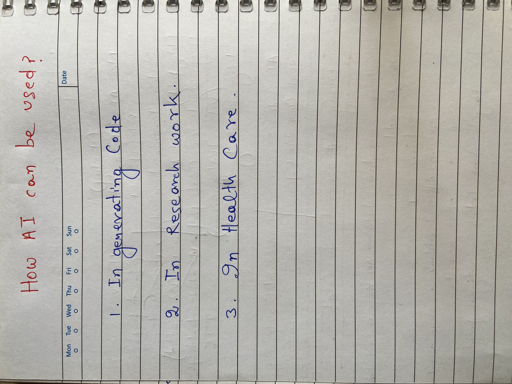

The image displays a top-down view of a page from a spiral-bound notebook. The paper is white or off-white with distinct horizontal black lines across the entire page.

At the very top of the page, a question is handwritten in red ink: "How AI can be used?". The words "How" and "AI" are capitalized, and a red question mark follows.

Below this question, there's a printed section, likely part of the notebook's template, featuring abbreviations for the days of the week: "Mon Tue Wed Thu Fri Sat Sun". Each day has a small circle printed directly below it. To the right of the days, there's a rectangular box labeled "Date" with a blank line next to it, also printed. These printed elements appear to be in a dark blue or black ink.

Below the planner section, a numbered list is handwritten in blue ink, detailing uses for AI:
1.  In generating Code
2.  In Research work.
3.  In Health Care.

The handwriting is a mix of cursive and print, generally neat and legible. The remainder of the page, below the third point, is blank but lined, extending to the bottom edge.

The right edge of the image clearly shows the metallic rings of the spiral binding, indicating it's a notebook or planner. There are some faint creases or slight textures visible on the paper.

In [9]:
import google.generativeai as genai
from google.colab import userdata
from IPython.display import display, Markdown
image = Image.open('hand-written-text.jpg', mode="r")  # create image object
image.thumbnail([512,512])
display(image)
try:
  GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
  genai.configure(api_key=GOOGLE_API_KEY)
  # Initialize the model that supports generateContent
  model = genai.GenerativeModel('gemini-2.5-flash')

  prompt = ["Describe the image ", image]
  response = model.generate_content(prompt)
  display(Markdown(response.text)) # Display the Markdown object
except Exception as e:
  print(f"An error occurred: {e}")
  print("Please check your API key and ensure the 'image' variable is defined.")